In [1]:
%matplotlib inline

#from __future__ import division, print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's start by looking at Gapminder data, which is tab-delimited, compiled by Jennifer Bryan. For more information, checkout her [gapminder](https://github.com/jennybc/gapminder) repository.

In [2]:
gm = pd.read_csv('data/gapminder.tsv', sep='\t')

In [3]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Let's say we're interested in Portugal's GDP per capita over time. First, create a DataFrame for the country.

In [4]:
portugal = gm[gm['country'] == 'Portugal']

Next, call the `plot()` function, which is the default line graph. The first argument corresponds to the $x$-axis and the second to the $y$-axis. Note that $x$ and $y$ must have the same dimensions&mdash;that is, be of the same length.

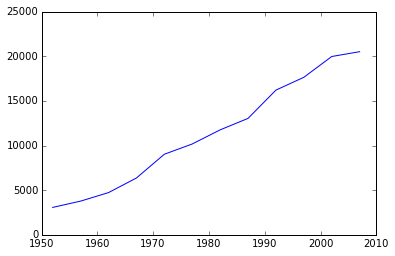

In [5]:
plt.plot(portugal.year, portugal.gdpPercap)

Let's think about this plot type. For data that has a time component, as the *yearly* GDP per capita does, a line is an appropiate choice.

What you see above are Matplotlib defaults. For now, we'll continue with those as the first portion of this workshop is geared toward getting yourself familiar with the API.

Great! So you now know how to create a line plot.

Before we continue, it might be interesting to get a sense of how many countries per continent we have data for.

In [6]:
countries = gm[['country', 'continent']]
countries = countries.drop_duplicates()

In [7]:
country_counts = pd.DataFrame({'n_countries' : countries.groupby('continent')['country'].count()}).reset_index()

In [8]:
country_counts

,continent,n_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


<Container object of 5 artists>

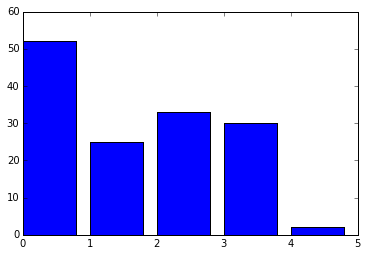

In [9]:
plt.bar(range(len(country_counts)), country_counts.n_countries)

It might seem strange to have the bars be left-aligned. Let's fix that by using the `align` parameter. Let's also label the x-ticks so we know the continents the bars correspond to. While we're add it, we'll also add a title.

([<matplotlib.axis.XTick at 0x10e370ac8>,
 <a list of 5 Text xticklabel objects>)

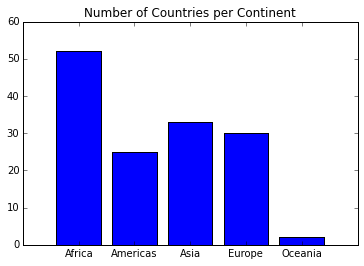

In [10]:
plt.bar(range(len(country_counts)), country_counts.n_countries, align='center')

plt.title('Number of Countries per Continent')
plt.xticks(country_counts['continent'].index, country_counts['continent'])

As you can see, we can call the `plt` multiple times. Most of the time, the order doesn't matter.

While we have this data fresh in our minds, it might make sense to look at the *average* GDP per capita in each continent on a given year (assuming that's even a valid operation to take). First, let's determine what years we can choose from.

In [11]:
gm.year.min(), gm.year.max()

(1952, 2007)

Let's go ahead and pick 1982.

In [12]:
gm1982 = gm[gm['year'] == 1982]

We'll want to look at continent-level data. For this, let's put the data into a list-like container.

In [13]:
continent_gdp = []

for c in np.sort(gm1982.continent.unique()):
    continent_gdp.append(gm1982[gm1982['continent'] == c]['gdpPercap'].values)

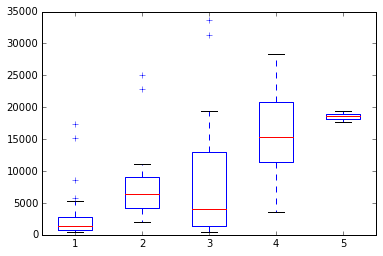

In [14]:
plt.boxplot(continent_gdp);

Protip: Use a semicolon (`;`) at the end of a line to suppress unwanted output.

This is a good plot for us to start customizing. As you can see, the boxplot in the fifth position from the left has a small range ans is, thus, difficult to see. Let's begin by increasing the size of the figure.

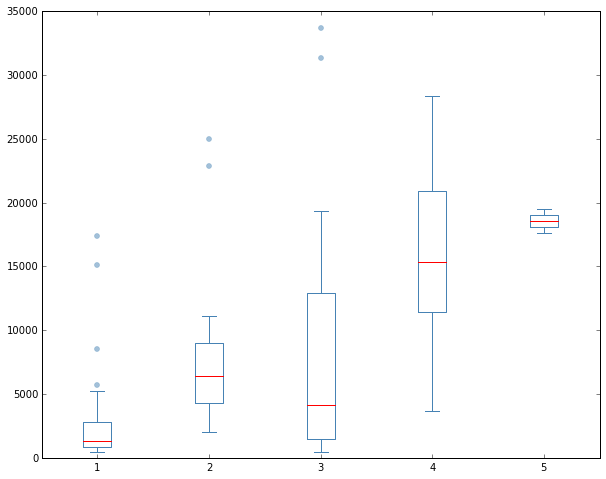

In [15]:
plt.figure(figsize=(10, 8))

color = 'SteelBlue'
flierprops = dict(marker='o', markersize=5, markerfacecolor='SteelBlue',
                  markeredgecolor=color, alpha=0.50, linestyle='none')
capprops = dict(color=color)
whiskerprops = dict(color=color, linestyle='-')
boxprops = dict(color=color)

plt.boxplot(continent_gdp, widths=0.25,
            flierprops=flierprops,
            capprops=capprops,
            whiskerprops=whiskerprops,
            boxprops=boxprops);

We said above that the code order doesn't usually matter. For setting figure options, such as `figsize`, it does.

In [16]:
gm1982.groupby('continent')['gdpPercap'].mean()

continent
Africa       2481.592960
Americas     7506.737088
Asia         7434.135157
Europe      15617.896551
Oceania     18554.709840
Name: gdpPercap, dtype: float64

In [17]:
gm1982.groupby('continent')['gdpPercap'].var()

continent
Africa      10514667.169140
Americas    30586324.851497
Asia        75710472.469740
Europe      41644239.727432
Oceania      1701272.514048
Name: gdpPercap, dtype: float64

How about we make this look slightly better. We'll use Cameron Davidson-Pilon's [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers) style.

In [18]:
plt.style.use('bmh')

In [19]:
print(plt.style.available)

['dark_background', 'fivethirtyeight', 'ggplot', 'bmh', 'grayscale']


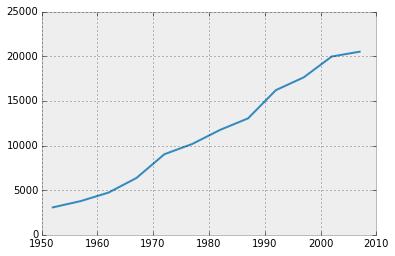

In [20]:
plt.plot(portugal.year, portugal.gdpPercap)

In [21]:
continent_gdp = gm.groupby(['continent', 'year'], as_index=False)['gdpPercap'].mean()

In [22]:
countries = np.sort(continent_gdp.continent.unique())

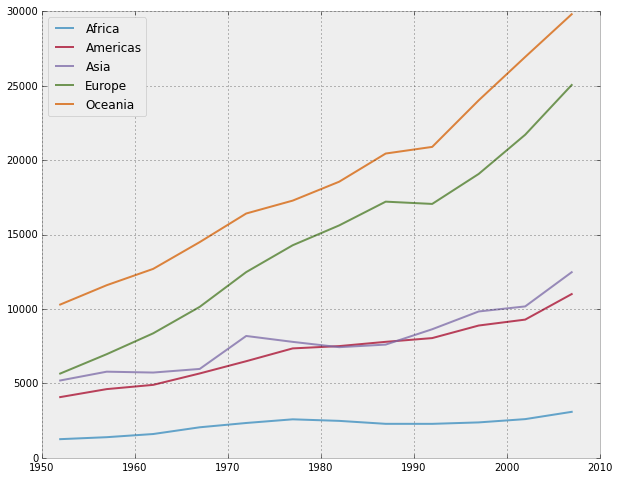

In [23]:
plt.figure(figsize=(10, 8))

for c in countries:
    tdf = continent_gdp[continent_gdp['continent'] == c]
    plt.plot(tdf['year'], tdf['gdpPercap'], alpha=0.75, label=c)
    
plt.legend(loc='upper left')

Remember that these are continent-level averages with lots of variation between countries.

In [24]:
x = np.random.rand(100)
y = np.random.randint(0, 1000, 100)

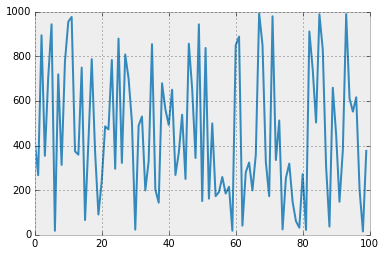

In [25]:
plt.plot(range(len(y)), y)

(-10, 1010)

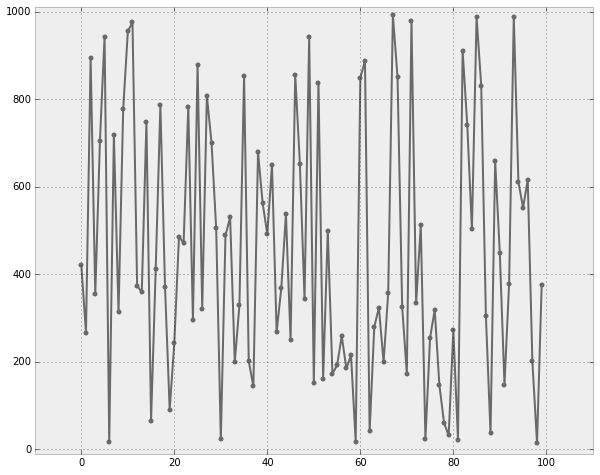

In [26]:
plt.figure(figsize=(10, 8))

plt.plot(range(len(y)), y, color='DimGray', marker='o', markersize=5, markeredgecolor='None')
plt.xlim(-10, 110)
plt.ylim(-10, 1010)

(-10, 110)

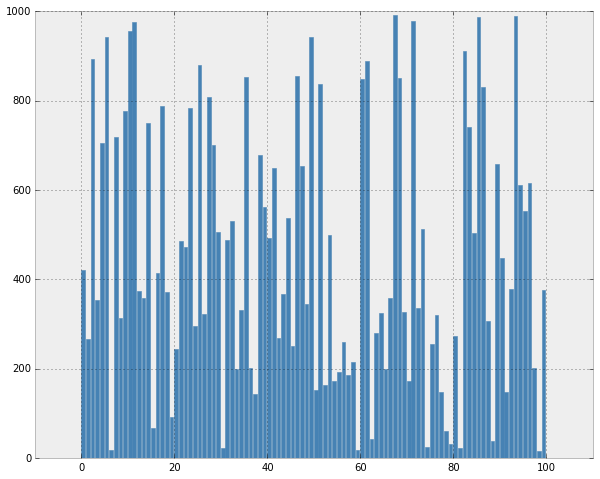

In [27]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(y)), y, color='SteelBlue', edgecolor='SteelBlue')

plt.xlim(-10, 110)

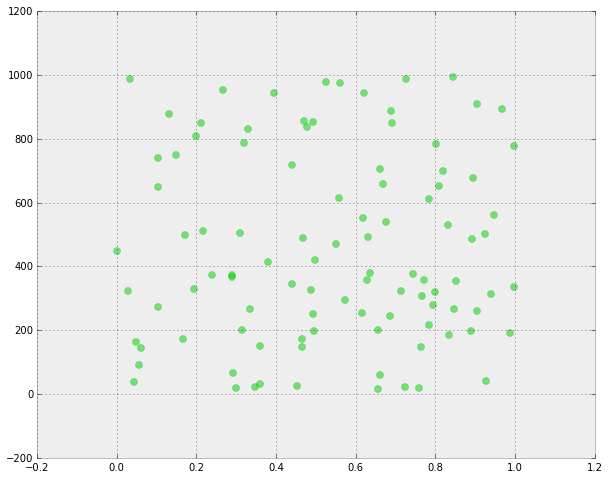

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='#00CC00', s=50, alpha=0.5, edgecolor='DimGray')